<a href="https://colab.research.google.com/github/aakashak2000/NLP_sem6/blob/master/J1_prac1_Roll_4%2611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [12]:
df = pd.read_json("http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz", lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"


In [0]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import nltk

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
review = df["reviewText"]

In [0]:
review=list(df.reviewText)

In [0]:
review_tokens=nltk.word_tokenize(str(review).lower())
review_tokens=[word.lower() for word in review_tokens if word.isalpha()]
review_tokens=[w for w in review_tokens if not w in stopwords.words('english')]

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(str(review_tokens))

In [0]:
import matplotlib.pyplot as plt

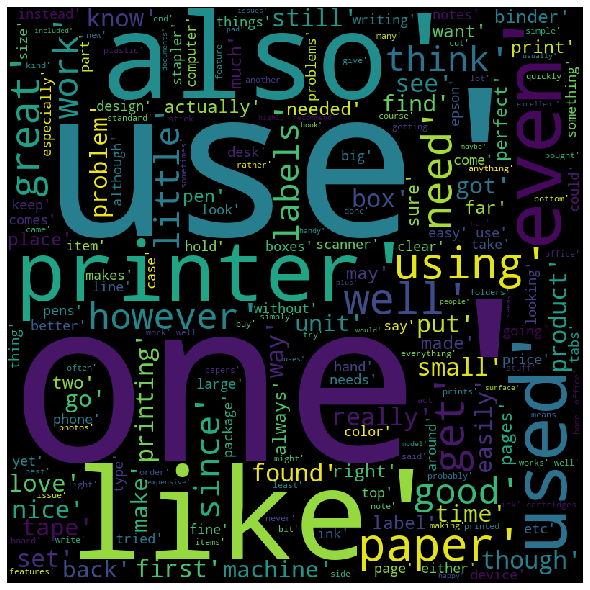

In [20]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [0]:
def sim_finder(text1,text2):
  l1=[]
  l2=[]
  text_tokens1=nltk.word_tokenize(text1)
  text_tokens1={word.lower() for word in text_tokens1 if word.isalpha()}
  text_tokens1={w for w in text_tokens1 if not w in stopwords.words('english')}
  text_tokens2=nltk.word_tokenize(text2)
  text_tokens2={word.lower() for word in text_tokens2 if word.isalpha()}
  text_tokens2={w for w in text_tokens2 if not w in stopwords.words('english')}
  rvector = text_tokens1.union(text_tokens2)
  for w in rvector: 
    if w in text_tokens1: l1.append(1) # create a vector 
    else: l1.append(0) 
    if w in text_tokens2: l2.append(1) 
    else: l2.append(0) 
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine


In [0]:
sim_list1=[]
for i in range(0,99):
  for j in range(1,100):
    sim_list1.append(sim_finder(df['reviewText'][i],df['reviewText'][j]))

In [27]:
sim_list1

[0.10853039276555741,
 0.08574929257125441,
 0.120474968393765,
 0.15453063444227516,
 0.1504823163572115,
 0.1473139127471974,
 0.08838834764831845,
 0.09847982464479191,
 0.07216878364870323,
 0.125,
 0.1417366773784602,
 0.07995026863335392,
 0.16269784336399212,
 0.18515322416288205,
 0.08603090020146065,
 0.018844459036110227,
 0.15467960838455727,
 0.08333333333333333,
 0.08603090020146065,
 0.08183170883849715,
 0.10714285714285714,
 0.05590169943749474,
 0.05892556509887897,
 0.07071067811865475,
 0.0625,
 0.04801382997483599,
 0.11785113019775793,
 0.1767766952966369,
 0.053300179088902604,
 0.04902903378454601,
 0.11225331376673432,
 0.05892556509887897,
 0.05892556509887897,
 0.06565321642986127,
 0.19245008972987526,
 0.08838834764831843,
 0.04490132550669373,
 0.0625,
 0.0545544725589981,
 0.14771973696718788,
 0.08333333333333333,
 0.11481983169296148,
 0.12711879496828166,
 0.16204530402191716,
 0.07905694150420949,
 0.06933752452815364,
 0.0,
 0.0545544725589981,
 0.139